In [4]:
#Supervised
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('data_ecom.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


ada data yang kosong kita drop yang ga ada nya? atau kita isi value nya dengan median/mean dari data yang ada 
kalau data nya > 90% kosong dalam suatu kolom, lebih baik tidak menggunakan data pada kolom tersebut

In [7]:
target = 'Reached.on.Time_Y.N'

eksplorasi tiap informasi terhadap target

In [8]:
#distribusi target variabel
data[target].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

<Axes: >

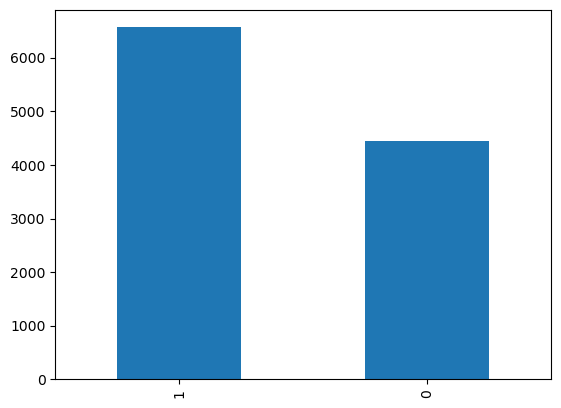

In [9]:
data[target].value_counts().plot(kind='bar')

In [10]:
data[target].value_counts() / len(data)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [11]:
data[target].sum()

6563

In [12]:
data[target].count() - data[target].sum()

4436

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

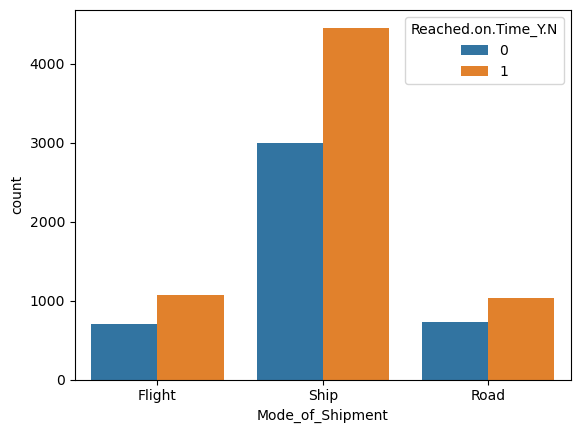

In [13]:
sns.countplot(x='Mode_of_Shipment', data=data, hue=target)

In [14]:
pivot_table = pd.pivot_table(data, columns=target,
                            index=['Mode_of_Shipment'], values='ID',
                            aggfunc='count')
pivot_table['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

Reached.on.Time_Y.N,0,1,Rate
Mode_of_Shipment,,,
Flight,708,1069,0.601576
Road,725,1035,0.588068
Ship,3003,4459,0.597561


In [15]:
pivot_table = pd.pivot_table(data, columns=target,
                            index=['Warehouse_block'], values='ID',
                            aggfunc='count')
pivot_table['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

Reached.on.Time_Y.N,0,1,Rate
Warehouse_block,,,
A,758,1075,0.586470
B,729,1104,0.602291
C,739,1094,0.596836
D,738,1096,0.597601
F,1472,2194,0.598472


In [16]:
pivot_table = pd.pivot_table(data, columns=target,
                            index=['Product_importance'], values='ID',
                            aggfunc='count')
pivot_table['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

Reached.on.Time_Y.N,0,1,Rate
Product_importance,,,
high,332,616,0.649789
low,2157,3140,0.592788
medium,1947,2807,0.590450


In [17]:
pivot_table = pd.pivot_table(data, columns=target,
                            index=['Product_importance', 'Mode_of_Shipment'], values='ID',
                            aggfunc='count')
pivot_table['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

Reached.on.Time_Y.N                     0     1      Rate
Product_importance Mode_of_Shipment                      
high               Flight              68    95  0.582822
                   Road                55   103  0.651899
                   Ship               209   418  0.666667
low                Flight             336   502  0.599045
                   Road               353   504  0.588098
                   Ship              1468  2134  0.592449
medium             Flight             304   472  0.608247
                   Road               317   428  0.574497
                   Ship              1326  1907  0.589855

In [18]:
data['group_weight_in_gms']=pd.qcut(data['Weight_in_gms'], q=5)
display(data.head())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,group_weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,"(1000.999, 1677.6]"
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,"(1677.6, 3319.8]"
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,"(3319.8, 4512.0]"
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,"(1000.999, 1677.6]"
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,"(1677.6, 3319.8]"


In [19]:
data['group_weight_in_gms']=pd.qcut(data['Weight_in_gms'], q=5)
display(data.head())

pivot_table = pd.pivot_table(data, columns=target,
                            index=['group_weight_in_gms'], values='ID',
                            aggfunc='count')
pivot_table['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,group_weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,"(1000.999, 1677.6]"
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,"(1677.6, 3319.8]"
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,"(3319.8, 4512.0]"
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,"(1000.999, 1677.6]"
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,"(1677.6, 3319.8]"


Reached.on.Time_Y.N,0,1,Rate
group_weight_in_gms,,,
"(1000.999, 1677.6]",710,1490,0.677273
"(1677.6, 3319.8]",336,1864,0.847273
"(3319.8, 4512.0]",855,1346,0.611540
"(4512.0, 5245.8]",1273,925,0.420837
"(5245.8, 7846.0]",1262,938,0.426364


In [20]:
data['group_cost_of_the_product']=pd.qcut(data['Cost_of_the_Product'], q=5)
display(data.head())

pivot_table = pd.pivot_table(data, columns=target,
                            index=['group_cost_of_the_product'], values='ID',
                            aggfunc='count')
pivot_table['Rate'] = pivot_table[1]/(pivot_table[1] + pivot_table[0])
pivot_table

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,group_weight_in_gms,group_cost_of_the_product
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,"(1000.999, 1677.6]","(161.0, 196.0]"
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,"(1677.6, 3319.8]","(196.0, 231.0]"
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,"(3319.8, 4512.0]","(161.0, 196.0]"
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,"(1000.999, 1677.6]","(161.0, 196.0]"
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,"(1677.6, 3319.8]","(161.0, 196.0]"


Reached.on.Time_Y.N,0,1,Rate
group_cost_of_the_product,,,
"(95.999, 161.0]",797,1438,0.643400
"(161.0, 196.0]",819,1371,0.626027
"(196.0, 231.0]",898,1330,0.596948
"(231.0, 257.0]",966,1220,0.558097
"(257.0, 310.0]",956,1204,0.557407


In [21]:
#Label encoder, one hot encoder
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data['Product_importance_coded'] = encoder.fit_transform(data['Product_importance'])
#label encoder dengan value yang banyak akan memberikan sebuah asumsi bahwa
#A lebih rendah dibandingkan B, B lebih rendah dibandingkan C dst
#padahal, belum tentu, bisa saja kemungkinan A>C, kemungkinan B>C
pd.pivot_table(data,columns='Product_importance_coded',
              index='Product_importance', values='ID', aggfunc='count')

Product_importance_coded,0,1,2
Product_importance,,,
high,948.0,NaN,NaN
low,NaN,5297.0,NaN
medium,NaN,NaN,4754.0


In [22]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,group_weight_in_gms,group_cost_of_the_product,Product_importance_coded
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,"(1000.999, 1677.6]","(161.0, 196.0]",1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,"(1677.6, 3319.8]","(196.0, 231.0]",1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,"(3319.8, 4512.0]","(161.0, 196.0]",1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,"(1000.999, 1677.6]","(161.0, 196.0]",2
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,"(1677.6, 3319.8]","(161.0, 196.0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,"(1000.999, 1677.6]","(231.0, 257.0]",2
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,"(1000.999, 1677.6]","(231.0, 257.0]",2
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,"(1000.999, 1677.6]","(231.0, 257.0]",1
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,"(1000.999, 1677.6]","(196.0, 231.0]",2


In [23]:
data['Product_importance_coded_2'] = np.where(data['Product_importance'] == 'low', 0,
                                             np.where(data['Product_importance'] == 'medium', 1, 2))

pd.pivot_table(data, columns='Product_importance_coded_2', 
              index='Product_importance', values='ID', aggfunc='count')

Product_importance_coded_2,0,1,2
Product_importance,,,
high,NaN,NaN,948.0
low,5297.0,NaN,NaN
medium,NaN,4754.0,NaN


In [24]:
#one hot encoder manual
data['Mode_of_Shipment_is_flight'] = np.where(data['Mode_of_Shipment']== 'Flight', 1,0)
data['Mode_of_Shipment_is_road'] = np.where(data['Mode_of_Shipment']== 'Road', 1,0)
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,group_weight_in_gms,group_cost_of_the_product,Product_importance_coded,Product_importance_coded_2,Mode_of_Shipment_is_flight,Mode_of_Shipment_is_road
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,"(1000.999, 1677.6]","(161.0, 196.0]",1,0,1,0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,"(1677.6, 3319.8]","(196.0, 231.0]",1,0,1,0
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,"(3319.8, 4512.0]","(161.0, 196.0]",1,0,1,0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,"(1000.999, 1677.6]","(161.0, 196.0]",2,1,1,0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,"(1677.6, 3319.8]","(161.0, 196.0]",2,1,1,0


In [25]:
#product importance
#low,medium,high -> string -> numeric
#0,1,2 -> label encoder -> mengubah string jadi numeric

#flight,road,ship
#0,1,2 -> salah
#one hot -> 1 kolom 3 unique -> varible baru nama is_flight,is_road,is_ship

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error', sparse=False)
#sparse return array ketika transform
#drop = 'first' -> drop first category dari data
#handle_unknown= 'error'-> kalo ada data nan dia error
x_onehot = data[['Warehouse_block']] #define x untuk fit trasnform
x_array = enc.fit_transform(x_onehot) #fit transform -> membuat variable baru seperti contoh di dataframe
x_out = pd.DataFrame(x_array, columns=enc.get_feature_names_out(['Warehouse_block'])) #dari array jadi data frame
#enc.get_feature_names_out([Warehouse_block]) -> membuat kolom baru -> warehouse_block_B dst
data_new = pd.concat([data, x_out], axis=1) #menggabungkan data dengan x_out
data_new

C:\Users\ryann\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,group_cost_of_the_product,Product_importance_coded,Product_importance_coded_2,Mode_of_Shipment_is_flight,Mode_of_Shipment_is_road,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,1,D,Flight,4,2,177,3,low,F,44,...,"(161.0, 196.0]",1,0,1,0,0.0,0.0,0.0,1.0,0.0
1,2,F,Flight,4,5,216,2,low,M,59,...,"(196.0, 231.0]",1,0,1,0,0.0,0.0,0.0,0.0,1.0
2,3,A,Flight,2,2,183,4,low,M,48,...,"(161.0, 196.0]",1,0,1,0,1.0,0.0,0.0,0.0,0.0
3,4,B,Flight,3,3,176,4,medium,M,10,...,"(161.0, 196.0]",2,1,1,0,0.0,1.0,0.0,0.0,0.0
4,5,C,Flight,2,2,184,3,medium,F,46,...,"(161.0, 196.0]",2,1,1,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,...,"(231.0, 257.0]",2,1,0,0,1.0,0.0,0.0,0.0,0.0
10995,10996,B,Ship,4,1,232,5,medium,F,6,...,"(231.0, 257.0]",2,1,0,0,0.0,1.0,0.0,0.0,0.0
10996,10997,C,Ship,5,4,242,5,low,F,4,...,"(231.0, 257.0]",1,0,0,0,0.0,0.0,1.0,0.0,0.0
10997,10998,F,Ship,5,2,223,6,medium,M,2,...,"(196.0, 231.0]",2,1,0,0,0.0,0.0,0.0,0.0,1.0


In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error', sparse=False, drop='first')

x_onehot = data[['Gender', 'Product_importance']] 
x_array = enc.fit_transform(x_onehot) 
x_out = pd.DataFrame(x_array, columns=enc.get_feature_names_out(['Gender', 'Product_importance'])) 

data_new_final = pd.concat([data, x_out], axis=1)
data_new_final

C:\Users\ryann\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Reached.on.Time_Y.N,group_weight_in_gms,group_cost_of_the_product,Product_importance_coded,Product_importance_coded_2,Mode_of_Shipment_is_flight,Mode_of_Shipment_is_road,Gender_M,Product_importance_low,Product_importance_medium
0,1,D,Flight,4,2,177,3,low,F,44,...,1,"(1000.999, 1677.6]","(161.0, 196.0]",1,0,1,0,0.0,1.0,0.0
1,2,F,Flight,4,5,216,2,low,M,59,...,1,"(1677.6, 3319.8]","(196.0, 231.0]",1,0,1,0,1.0,1.0,0.0
2,3,A,Flight,2,2,183,4,low,M,48,...,1,"(3319.8, 4512.0]","(161.0, 196.0]",1,0,1,0,1.0,1.0,0.0
3,4,B,Flight,3,3,176,4,medium,M,10,...,1,"(1000.999, 1677.6]","(161.0, 196.0]",2,1,1,0,1.0,0.0,1.0
4,5,C,Flight,2,2,184,3,medium,F,46,...,1,"(1677.6, 3319.8]","(161.0, 196.0]",2,1,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,...,1,"(1000.999, 1677.6]","(231.0, 257.0]",2,1,0,0,0.0,0.0,1.0
10995,10996,B,Ship,4,1,232,5,medium,F,6,...,0,"(1000.999, 1677.6]","(231.0, 257.0]",2,1,0,0,0.0,0.0,1.0
10996,10997,C,Ship,5,4,242,5,low,F,4,...,0,"(1000.999, 1677.6]","(231.0, 257.0]",1,0,0,0,0.0,1.0,0.0
10997,10998,F,Ship,5,2,223,6,medium,M,2,...,0,"(1000.999, 1677.6]","(196.0, 231.0]",2,1,0,0,1.0,0.0,1.0


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [29]:
data_new_final[target].value_counts() / len(data_new_final)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [30]:
data_new_final.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'group_weight_in_gms',
       'group_cost_of_the_product', 'Product_importance_coded',
       'Product_importance_coded_2', 'Mode_of_Shipment_is_flight',
       'Mode_of_Shipment_is_road', 'Gender_M', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [31]:
features = ['Weight_in_gms', 'Customer_rating', 'Product_importance_coded_2']
x = data_new_final [features] #features
y = data_new_final[target] #target

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2,
                                                   random_state=42, stratify=y)
#test_size = jumlah data yang akan kita jadikan test (0.2 -> 20%)
#random_state = ketika kita jalankan, kombinasi random tidak berubah
#stratify = menyeimbangkan jumlah data berdasarkan y, target survive atau tidak
print("Jumlah data train dan test, 80:20", len(x_train), len(x_test))
print('train')
display(y_train.value_counts() / len(y_train))

print('test')
display(y_test.value_counts() / len(y_test))

Jumlah data train dan test, 80:20 8799 2200
train


1    0.596659
0    0.403341
Name: Reached.on.Time_Y.N, dtype: float64

test


1    0.596818
0    0.403182
Name: Reached.on.Time_Y.N, dtype: float64

In [32]:
#initiliaze the model
logit_model = LogisticRegression()
logit_model.fit(X=x_train, y=y_train) #fitting

LogisticRegression()

In [33]:
y_pred_test = logit_model.predict(x_test) #prediksi data test
y_pred_train = logit_model.predict(x_train) #prediksi data train

In [34]:
test_pivot = pd.crosstab(y_pred_test, y_test)#index, coloumns
train_pivot = pd.crosstab(y_pred_train, y_train)
display(train_pivot, test_pivot)

#objectif kita disini adalah meningkatkan score accuracy dari data setinggi mungkin

Reached.on.Time_Y.N,0,1
row_0,,
0,1494,1143
1,2055,4107


Reached.on.Time_Y.N,0,1
row_0,,
0,415,268
1,472,1045


In [35]:
#baris -> hasil prediksi, kolom data sebenarnya
#menghitung seberapa tepat model kita untuk klasifikasi dengan menggunakan accuracy
#confusion matrix -> crosstab/pivot table antara hasil prediksi dengan hasil asli
train_acc = (4107 + 1494) / len(y_train)
test_acc = (1045 + 415) / len(y_test)
print(train_acc, test_acc)

0.6365496079099898 0.6636363636363637


In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_train, y_train))
print(accuracy_score(y_pred_test, y_test))

0.6365496079099898
0.6636363636363637


# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [38]:
features = ['Weight_in_gms', 'Cost_of_the_Product', 'Product_importance_coded']
X = data_new_final[features] #features
y = data_new_final [target]#target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
model = DecisionTreeClassifier(max_depth=8, random_state=42)
#semakin besar max_depth -> semakin overfit -> score train dan test jauh berbeda
#(train = mendekati 1, test rendah)
#semakin kecil, semakin underfit

In [40]:
model.fit(X_train, y_train)
y_pred_t_test = model.predict(X_test) #prediksi data test
y_pred_t_train = model.predict(X_train) #prediksi data train

In [41]:
accuracy_score(y_pred_t_train, y_train) #accuracy train

0.705648369132856

In [47]:
accuracy_score(y_pred_test, y_test) #accuray test

0.6740909090909091

In [43]:
#Prediksi data baru
data_baru = pd.DataFrame([[5000,50,2],[1000,25,1],[1233,177,1]], columns=features)
data_baru['prediksi'] = model.predict(data_baru)
data_baru

,Weight_in_gms,Cost_of_the_Product,Product_importance_coded,prediksi
0,5000,50,2,0
1,1000,25,1,1
2,1233,177,1,1


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [46]:
features = ['Weight_in_gms', 'Cost_of_the_Product', 'Product_importance_coded']
X = data_new_final[features] #features
y = data_new_final[target] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('jumlah data train dan test, 80:20 =', len(X_train), len(X_test))

knn.fit (X=X_train, y=y_train) #fitting sudah selesai
y_pred_test = knn.predict(X_test) #prediksi data test
y_pred_train = knn.predict(X_train) #prediksi data train

print('accuracy train', knn.score(X_train, y_train))
print('accuracy test', knn.score(X_test, y_test))

test_pivot = pd.crosstab(y_pred_test, y_test)
train_pivot = pd.crosstab(y_pred_train, y_train)
display(train_pivot, test_pivot)

jumlah data train dan test, 80:20 = 8799 2200
accuracy train 0.7107625866575747
accuracy test 0.6740909090909091


Reached.on.Time_Y.N,0,1
row_0,,
0,2926,1922
1,623,3328


Reached.on.Time_Y.N,0,1
row_0,,
0,702,532
1,185,781
